In [1]:
import numpy as np
import pandas as pd
#pd.set_option("display.precision",None)
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import pickle

In [2]:
#View csv file
df = pd.read_csv('Automobile.csv')
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [3]:
#Last five rows
df.tail()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,usa
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,usa
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,usa
397,chevy s-10,31.0,4,119.0,82.0,2720,19.4,82,usa


In [4]:
#View row and column
row, column = df.shape
print('Dataset has',row,'rows')
print('Dataset has',column, 'columns')

Dataset has 398 rows
Dataset has 9 columns


In [5]:
#Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
#More Data Information
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [7]:
#Data information including dtypes object
df.describe(include = object).transpose()

,count,unique,top,freq
name,398,305,ford pinto,6
origin,398,3,usa,249


In [8]:
#To check for duplication
df.duplicated().sum()

0

In [9]:
#check for Nan values
df.isna().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [10]:
#Check for empty values
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [11]:
#Countries total counts
df['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [12]:
#Car total counts
df['name'].value_counts()

name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [13]:
#Column Names
list(enumerate(df.columns))

[(0, 'name'),
 (1, 'mpg'),
 (2, 'cylinders'),
 (3, 'displacement'),
 (4, 'horsepower'),
 (5, 'weight'),
 (6, 'acceleration'),
 (7, 'model_year'),
 (8, 'origin')]

In [14]:
## Visualisations

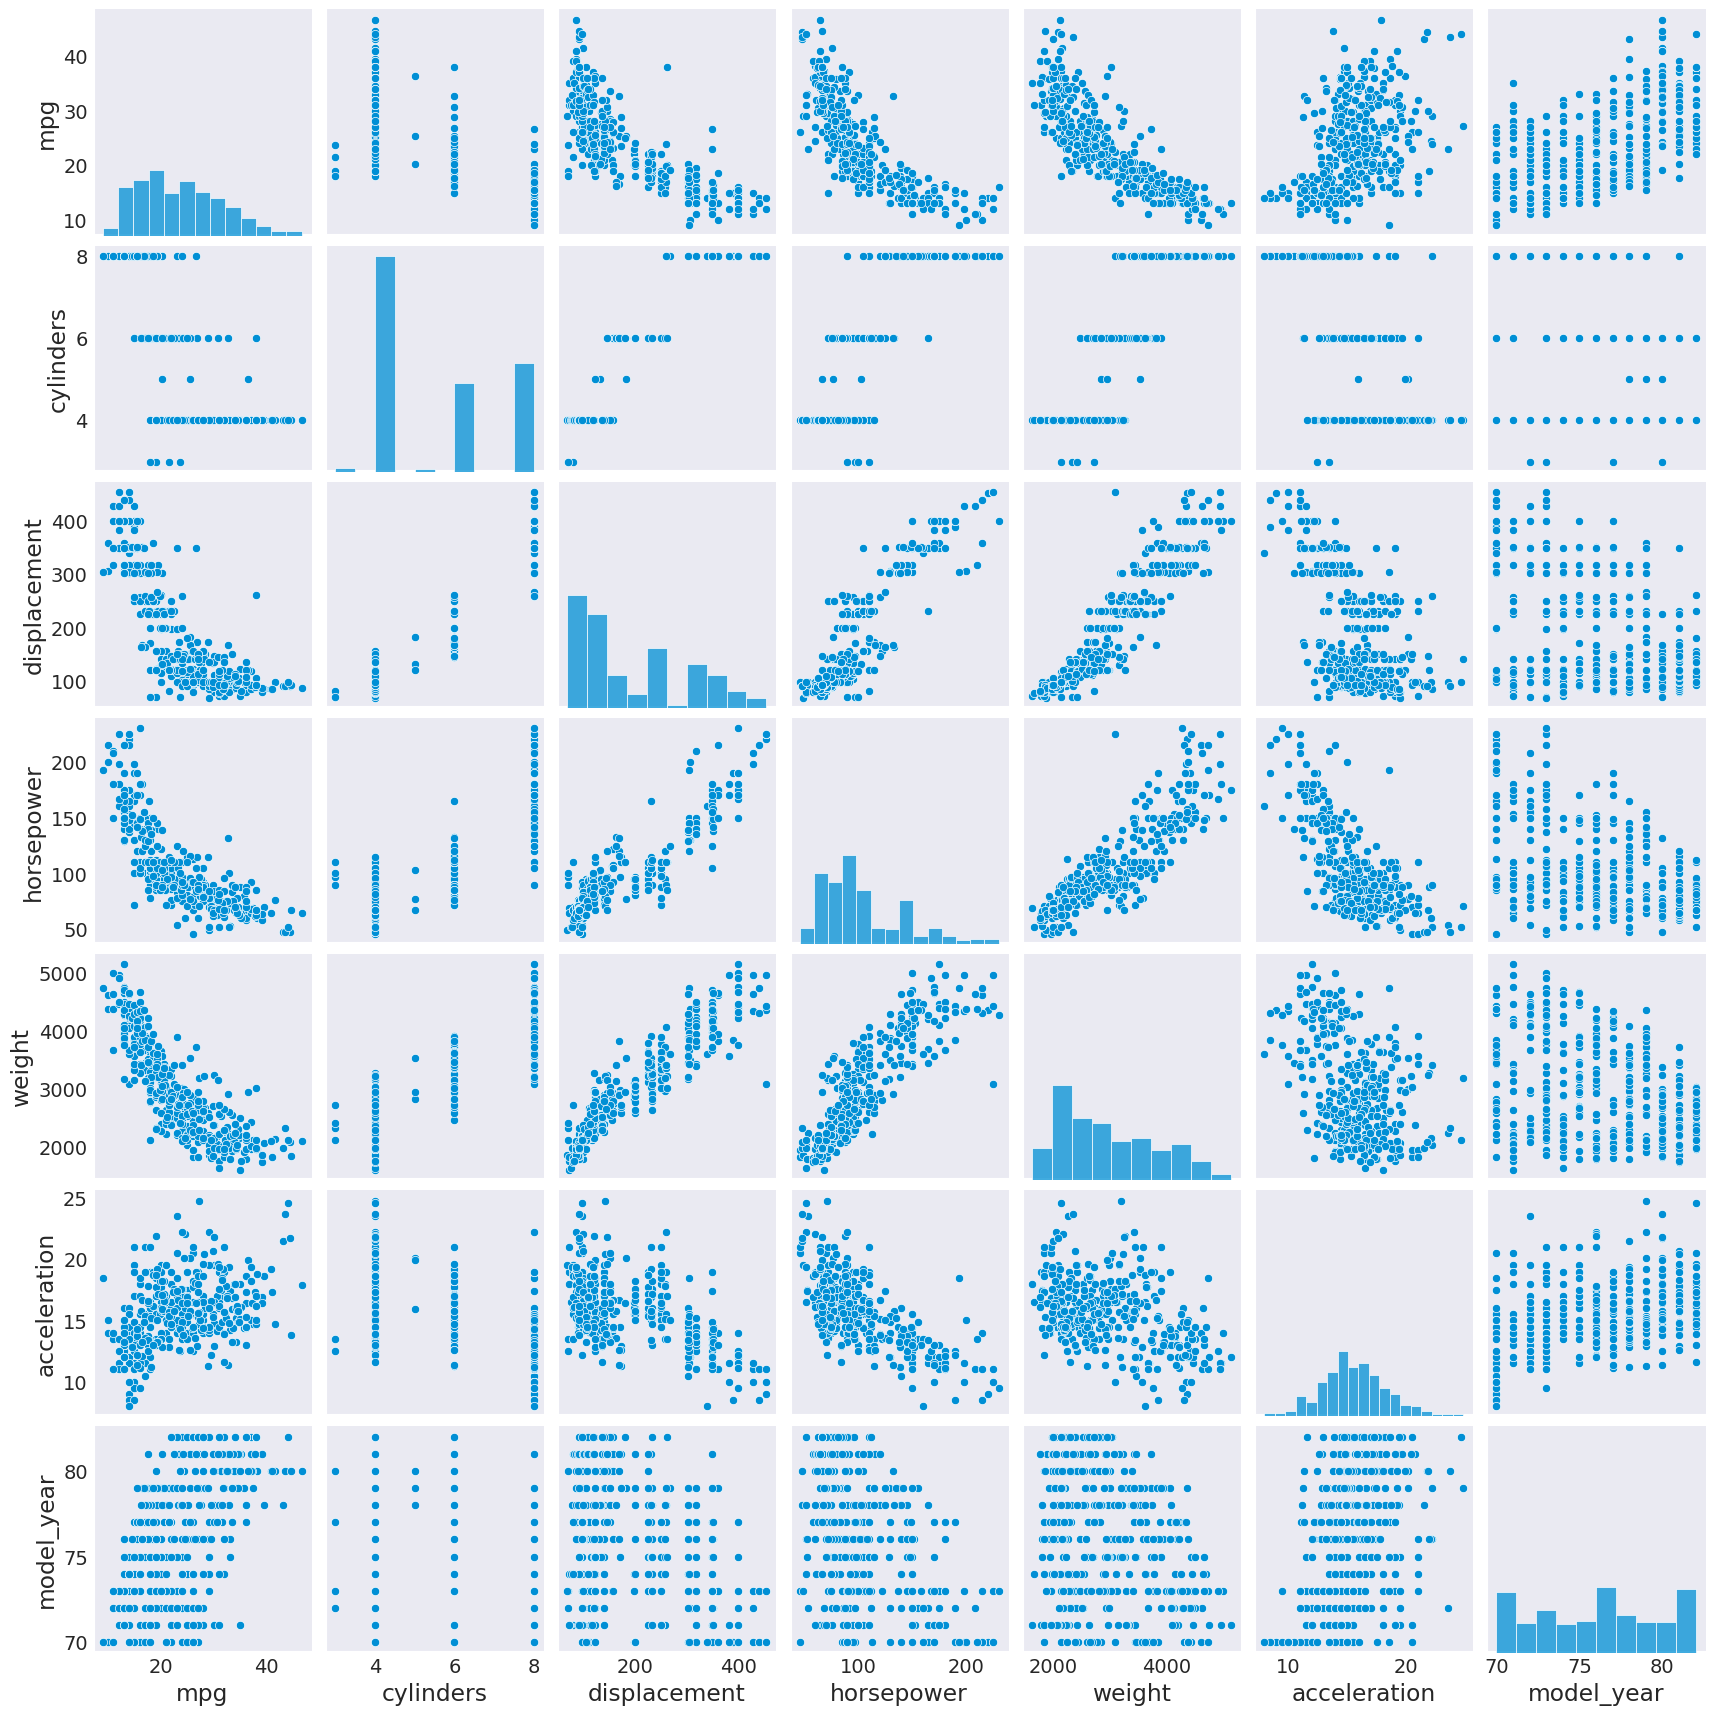

In [15]:
#Multiple visualisations
sns.pairplot(df)

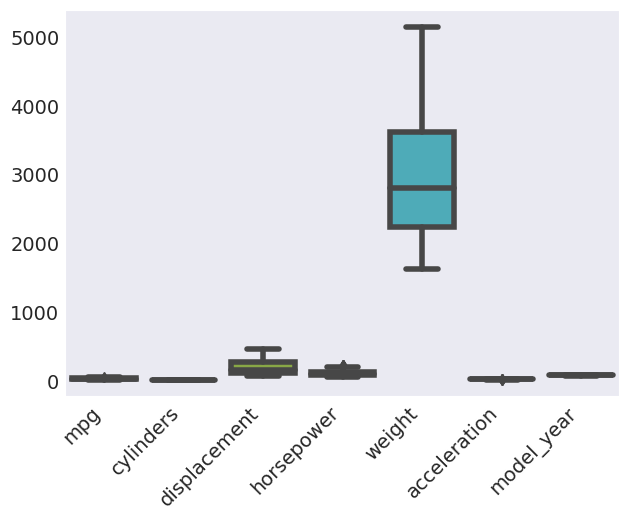

In [16]:
#Boxplot visualisation to determine if outliers are present
ax = sns.boxplot(df)

# Rotate x-labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Show the plot
plt.show()

In [17]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder
feature_col = ['name', 'origin']
encoder = LabelEncoder()
for col in feature_col:
    df[col] = encoder.fit_transform(df[col])

In [18]:
df.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,49,18.0,8,307.0,130.0,3504,12.0,70,2
1,36,15.0,8,350.0,165.0,3693,11.5,70,2
2,231,18.0,8,318.0,150.0,3436,11.0,70,2
3,14,16.0,8,304.0,150.0,3433,12.0,70,2
4,161,17.0,8,302.0,140.0,3449,10.5,70,2


In [19]:
df_co = df[['name', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin']]

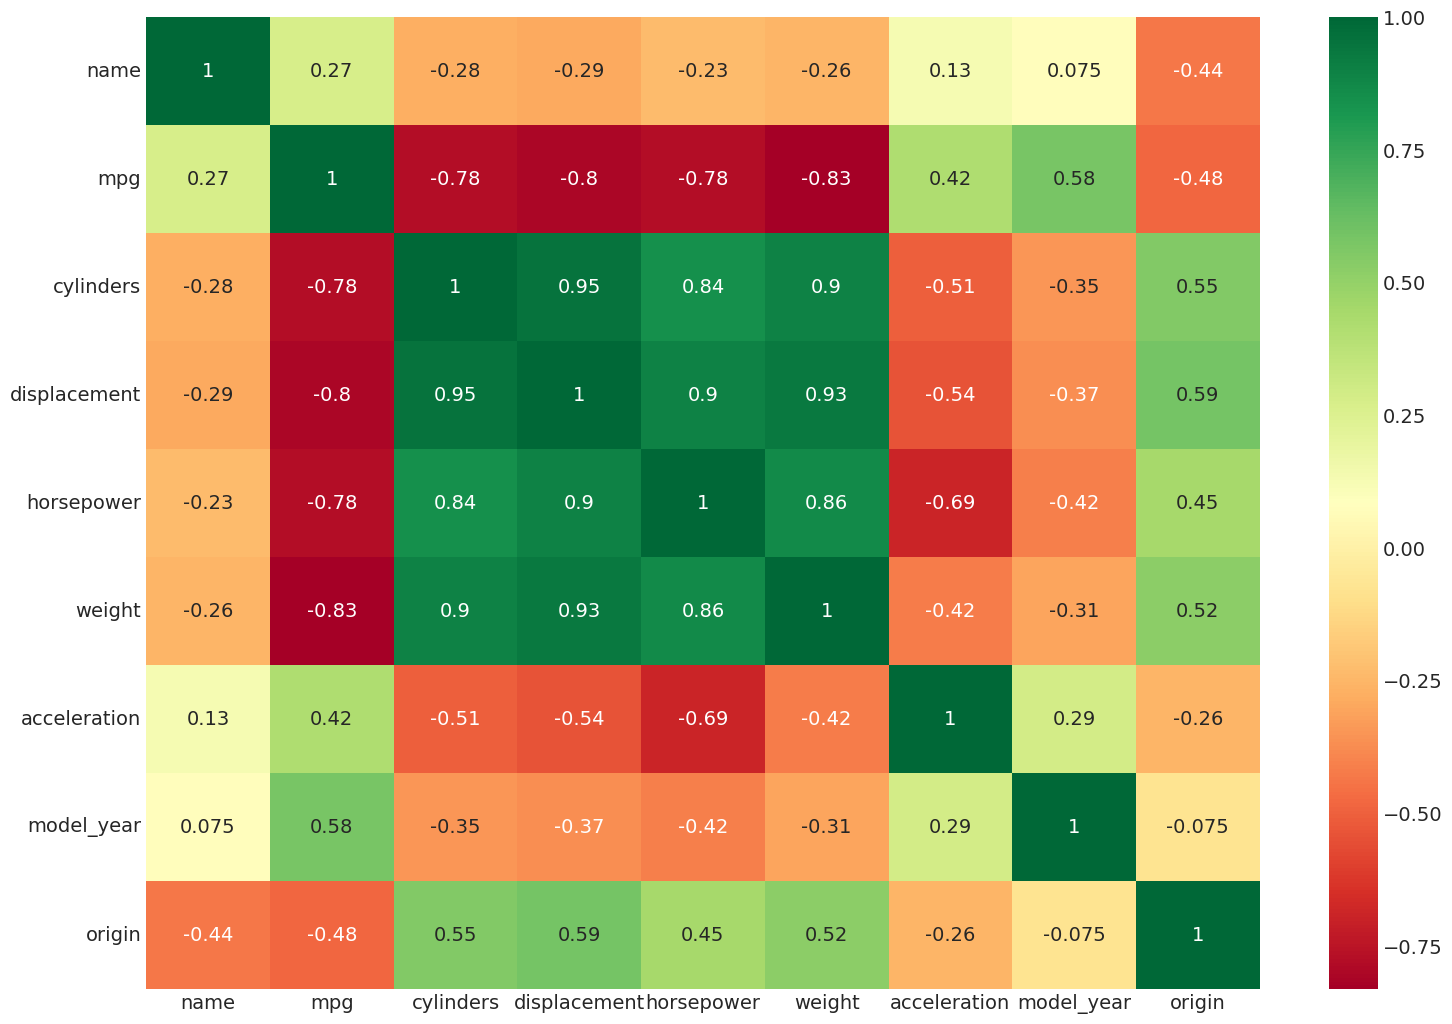

In [20]:
#Heat Map
plt.figure(figsize = (16, 12))
sns.heatmap(df_co.corr(),cmap = 'RdYlGn', annot = True, fmt ='.2g')
plt.show()

## Model Training

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df1 = df[['name', 'model_year', 'acceleration', 'origin']]
X = df1.drop('origin', axis = 1)
y = df1.origin

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [24]:
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (318, 3)
Test shape: (80, 3)


In [25]:
from sklearn.metrics import accuracy_score, mean_absolute_error

### Random Forest Classifier

In [26]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
ypred = rfc.predict(X_test)

In [27]:
rfc.predict([[49,3504,12]])

array([2])

In [28]:
print('Accuracy Score =', round(accuracy_score(y_test,ypred) * 100,2),'%')
print('Mean Absolute Error =', (mean_absolute_error(y_test,ypred)))

Accuracy Score = 87.5 %
Mean Absolute Error = 0.1625


### Gradient Boosting Classifier

In [29]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
ypred = gbc.predict(X_test)

In [30]:
print('Accuracy Score =', round(accuracy_score(y_test,ypred) * 100,2),'%')
print('Mean Absolute Error =', (mean_absolute_error(y_test,ypred)))

Accuracy Score = 95.0 %
Mean Absolute Error = 0.075


### From the above, we can determine that the Gradient Boosting Classifier is the better classifier to train the model, with an accuracy score of 95% and a mean absolute error of 0.075(The closer it is to zero, the better)

In [31]:
#Save to pickle file
file = open('car_data.pkl','wb')
pickle.dump(gbc, file)
file.close()

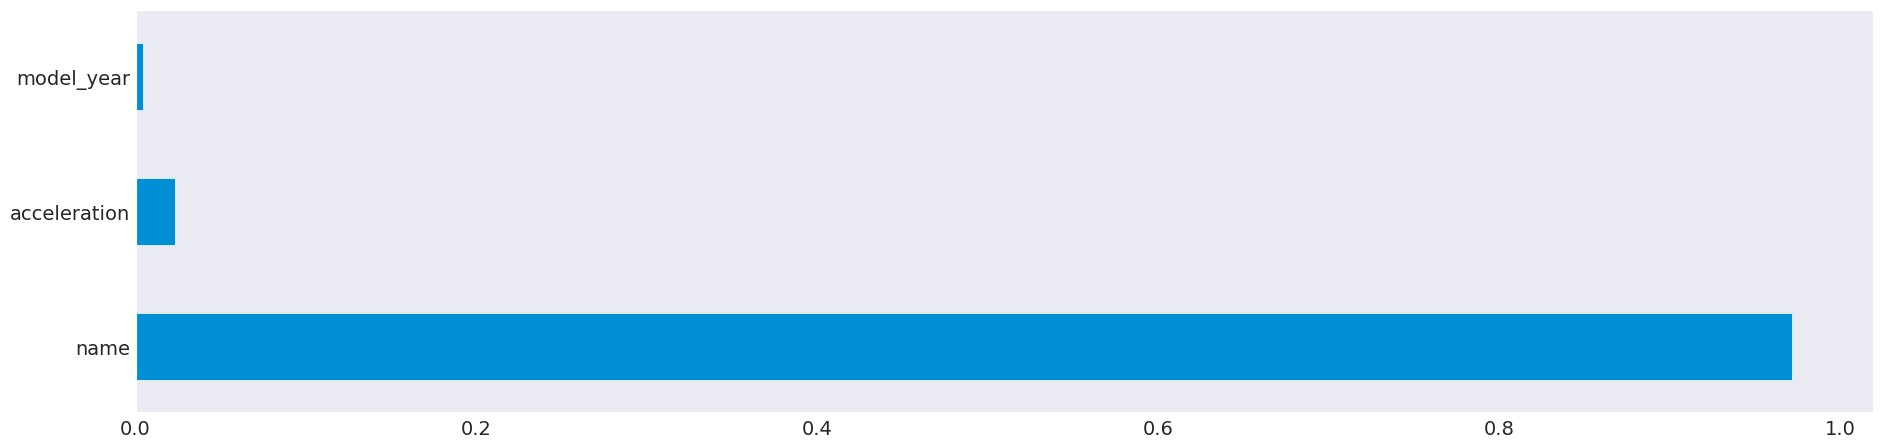

In [32]:
#Feature Importance
feat_importance = pd.Series(gbc.feature_importances_,index = X_train.columns)
feat_importance.nlargest(5).plot(kind= 'barh', figsize=(20,5))
plt.savefig('feature.jpg')
plt.show()